In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(5)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [5]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
35712,False,False,False,False
35713,False,False,False,False
35714,False,False,False,False
35715,False,False,False,False


<ipython-input-8-ea56d8dcfeb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Occupancy']);


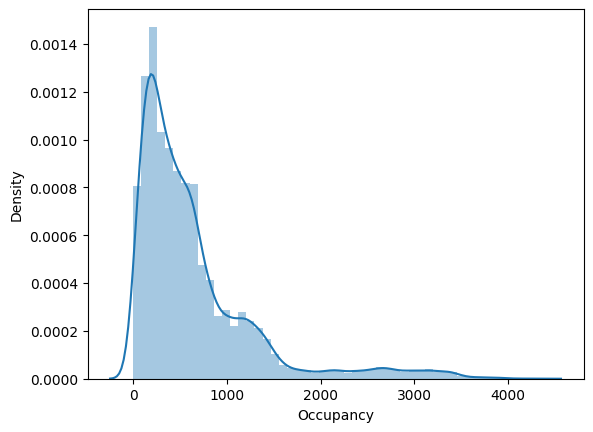

In [8]:
sns.distplot(df['Occupancy']);

Text(0.5, 1.0, 'Occupancy')

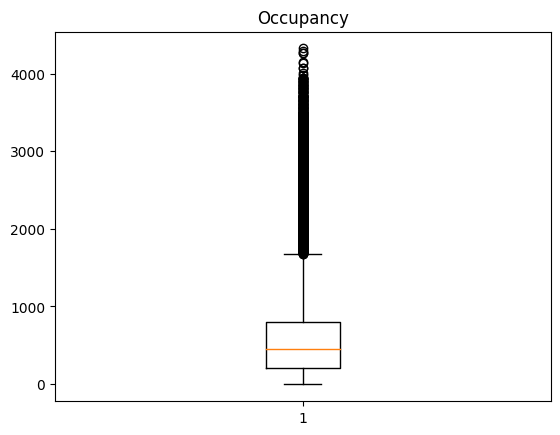

In [9]:
plt.boxplot(df['Occupancy'])
plt.title('Occupancy')

Text(0.5, 1.0, 'Capacity')

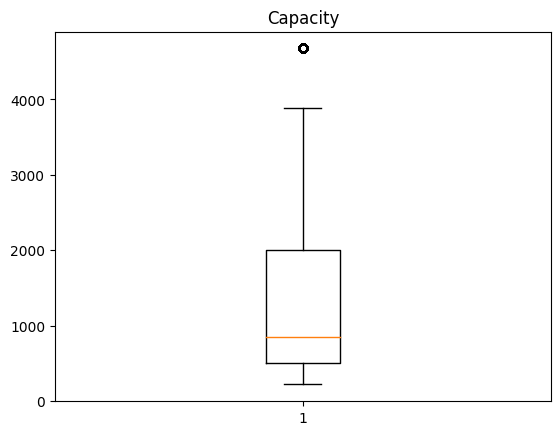

In [10]:
plt.boxplot(df['Capacity'])
plt.title('Capacity')

In [12]:
df['date'] = pd.to_datetime(df['LastUpdated'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.weekofyear
df['code_number'] = df['SystemCodeNumber'].apply(lambda x: 1 if x == 'BHMBCCMKT01' else 2 if x=='BHMBCCPST01' else 3 if x=='BHMBCCSNH01'
                                         else 4 if x=='BHMBCCTHL01' else 5 if x=='BHMBRCBRG01' else 6 if x=='BHMBRCBRG02' else 7 if
                                         x=='BHMBRCBRG03' else 8 if x=='BHMBRTARC01' else 9 if x=='BHMEURBRD01'
                                         else 10 if x=='BHMEURBRD02' else 11 if x=='BHMMBMMBX01' else 12 if x=='BHMNCPHST01'
                                         else 13 if x=='BHMNCPLDH01' else 14 if x=='BHMNCPNHS01' else 15 if x=='BHMNCPNST01'
                                         else 16 if x=='BHMNCPPLS01' else 17 if x=='BHMNCPRAN01' else 18 if x=='Broad Street'
                                         else 19 if x=='Bull Ring'   else 20 if x=='NIA Car Parks' else 21 if x== 'NIA North'
                                         else 22 if x=='NIA South'   else 23 if x=='Others-CCCPS105a' else 24 if x=='Others-CCCPS119a'
                                         else 25 if x=='Others-CCCPS133' else 26 if x=='Others-CCCPS135a' else 27 if x=='Others-CCCPS202'
                                         else 28 if x=='Others-CCCPS8' else 29 if x=='Others-CCCPS98' else 30)
df['occupancy_rate'] = df['Occupancy']/df['Capacity']

<ipython-input-12-b49cdc659850>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['date'].dt.weekofyear


In [13]:
df1 = df.drop(['SystemCodeNumber' , 'Capacity' , 'Occupancy' , 'LastUpdated' , 'date'],axis=1)

In [14]:
df1.head()

,day,month,year,hour,minute,day_of_week,week_of_year,code_number,occupancy_rate
0,4,10,2016,7,59,1,40,1,0.105719
1,4,10,2016,8,25,1,40,1,0.110919
2,4,10,2016,8,59,1,40,1,0.138648
3,4,10,2016,9,32,1,40,1,0.185442
4,4,10,2016,9,59,1,40,1,0.259965


<ipython-input-15-ae182f44c2a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['occupancy_rate']);


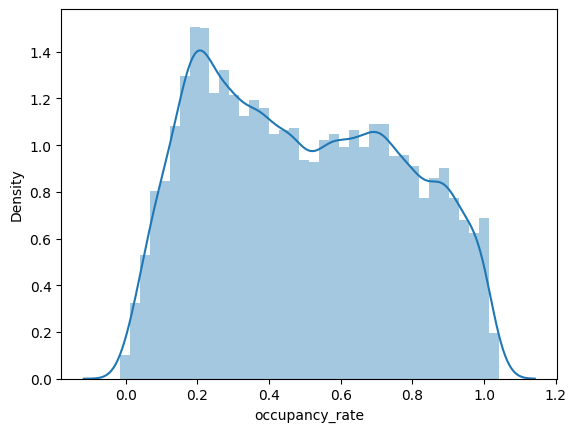

In [15]:
sns.distplot(df1['occupancy_rate']);

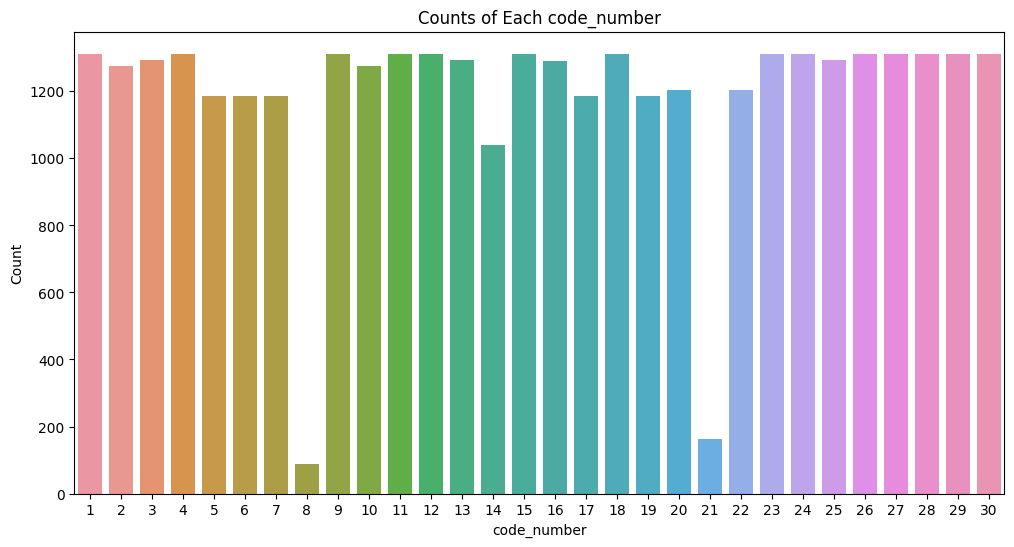

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df1['code_number'].value_counts().index, y=df1['code_number'].value_counts())
plt.title('Counts of Each code_number')
plt.xlabel('code_number')
plt.ylabel('Count')
plt.show()

<ipython-input-17-ea56d8dcfeb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Occupancy']);


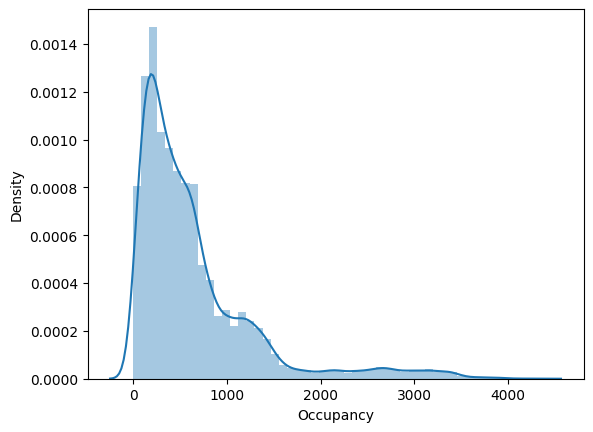

In [17]:
sns.distplot(df['Occupancy']);

In [18]:
train_set, test_set = train_test_split(df1, test_size=0.20, shuffle=True, random_state=50)
X = train_set.drop(['occupancy_rate'], axis='columns')
y = train_set['occupancy_rate']

X_test = test_set.drop(['occupancy_rate'] , axis='columns')
y_test = test_set['occupancy_rate']

**KNN**

In [19]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [20]:
# Create the KNeighborsRegressor model
knn_model = KNeighborsRegressor()

In [21]:
# Create GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [22]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [25]:
y_pred_best = cross_val_predict(best_knn_model, X, y, cv=5)

In [26]:
# Evaluate the best model
print('MSE: {}'.format(metrics.mean_squared_error(y, y_pred_best, squared=True)))
print('RMSE: {}' .format(sqrt(metrics.mean_squared_error(y, y_pred_best, squared=True))))
print('MAE: {}' .format(metrics.mean_absolute_error(y, y_pred_best)))
print('R2: {}' .format(metrics.r2_score(y, y_pred_best)))

MSE: 0.03150671614668647
RMSE: 0.17750131308440079
MAE: 0.14132418364674215
R2: 0.5729743800276308


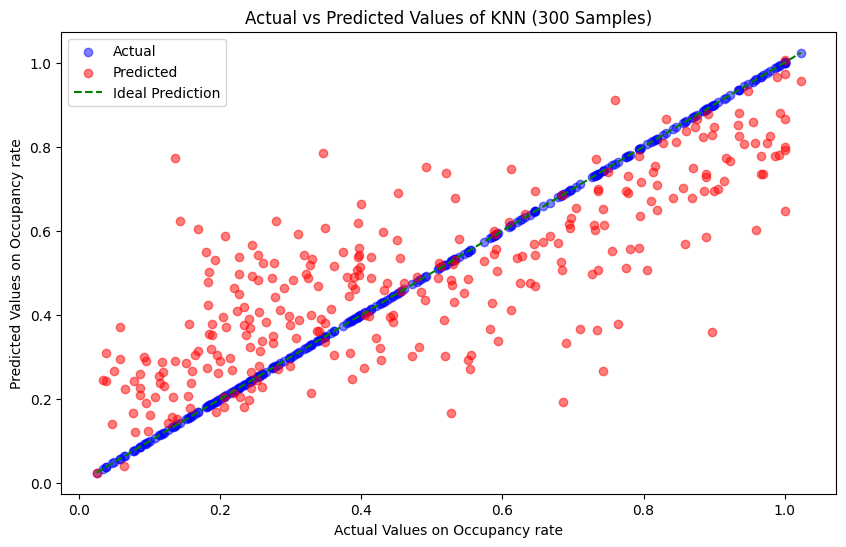

In [27]:
y_subset = y[:300]
y_pred_best_subset = y_pred_best[:300]

plt.figure(figsize=(10, 6))

# Scatter plot for actual values (in blue)
plt.scatter(y_subset, y_subset, alpha=0.5, label='Actual', color='blue')

# Scatter plot for predicted values (in red)
plt.scatter(y_subset, y_pred_best_subset, alpha=0.5, label='Predicted', color='red')

# Ideal Prediction line
plt.plot([min(y_subset), max(y_subset)], [min(y_subset), max(y_subset)], linestyle='--', color='green', label='Ideal Prediction')

plt.title('Actual vs Predicted Values of KNN (300 Samples)')
plt.xlabel('Actual Values on Occupancy rate')
plt.ylabel('Predicted Values on Occupancy rate')
plt.legend()
plt.show()

**Random Forest regressor**

In [28]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [20, 30],
    'max_depth': [None, 10, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [29]:
# Create RandomForestRegressor
rf_model = RandomForestRegressor()

# Use mean squared error as the scoring metric
scorer = make_scorer(mean_squared_error, squared=True)

In [30]:
# Setup grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, scoring=scorer, cv=5)

# Fit the model to the data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 30]},
             scoring=make_scorer(mean_squared_error, squared=True))

In [31]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = cross_val_predict(best_rf_model, X, y, cv=5)

In [32]:
# Print evaluation metrics for the best model
print('MSE: {:.2f}'.format(mean_squared_error(y, y_pred_best_rf, squared=True)))
print('RMSE: {:.2f}'.format(sqrt(mean_squared_error(y, y_pred_best_rf, squared=True))))
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(y, y_pred_best_rf)))
print('R2: {:.2f}'.format(metrics.r2_score(y, y_pred_best_rf)))

MSE: 0.01
RMSE: 0.08
MAE: 0.05
R2: 0.92


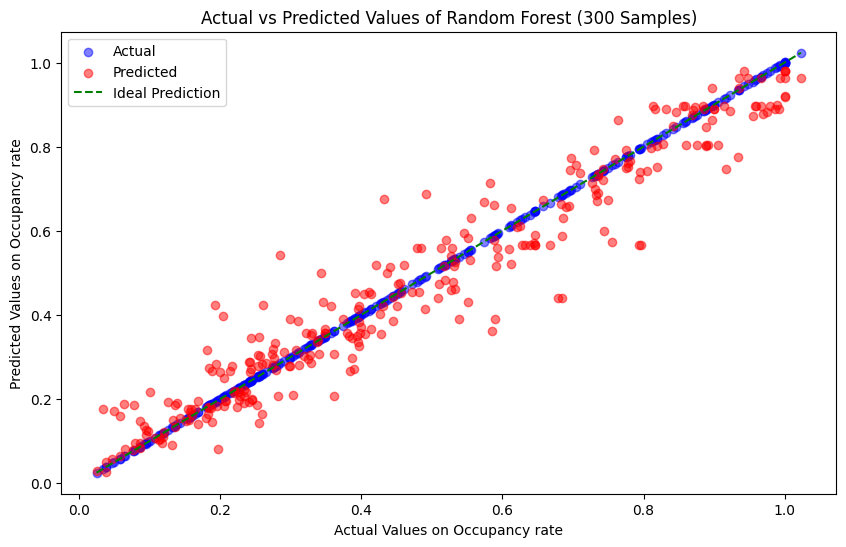

In [34]:
y_subset = y[:300]
y_pred_subset = y_pred_best_rf[:300]

plt.figure(figsize=(10, 6))

# Scatter plot for actual values (in blue)
plt.scatter(y_subset, y_subset, alpha=0.5, label='Actual', color='blue')

# Scatter plot for predicted values (in red)
plt.scatter(y_subset, y_pred_subset, alpha=0.5, label='Predicted', color='red')

# Ideal Prediction line
plt.plot([min(y_subset), max(y_subset)], [min(y_subset), max(y_subset)], linestyle='--', color='green', label='Ideal Prediction')

plt.title('Actual vs Predicted Values of Random Forest (300 Samples)')
plt.xlabel('Actual Values on Occupancy rate')
plt.ylabel('Predicted Values on Occupancy rate')
plt.legend()
plt.show()

**Linear Regression**

In [35]:
y_pred_lr = cross_val_predict(LinearRegression(), X, y, cv=5)

In [36]:
print('MSE: {}'.format(metrics.mean_squared_error(y, y_pred_lr, squared=True)))
print('RMSE: {}' .format(sqrt(metrics.mean_squared_error(y,y_pred_lr,squared=True))))
print('MAE: {}' .format(metrics.mean_absolute_error(y,y_pred_lr)))
print('R2: {}' .format(metrics.r2_score(y, y_pred_lr)))

MSE: 0.05945956329422968
RMSE: 0.24384331709979193
MAE: 0.20609153440946332
R2: 0.19411604939110483


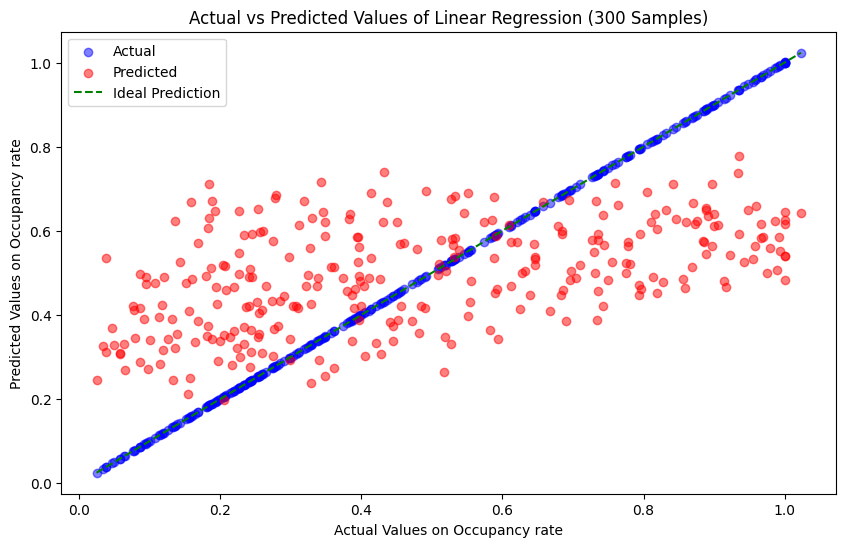

In [37]:
y_subset = y[:300]
y_pred_subset = y_pred_lr[:300]

plt.figure(figsize=(10, 6))

# Scatter plot for actual values (in blue)
plt.scatter(y_subset, y_subset, alpha=0.5, label='Actual', color='blue')

# Scatter plot for predicted values (in red)
plt.scatter(y_subset, y_pred_subset, alpha=0.5, label='Predicted', color='red')

# Ideal Prediction line
plt.plot([min(y_subset), max(y_subset)], [min(y_subset), max(y_subset)], linestyle='--', color='green', label='Ideal Prediction')

plt.title('Actual vs Predicted Values of Linear Regression (300 Samples)')
plt.xlabel('Actual Values on Occupancy rate')
plt.ylabel('Predicted Values on Occupancy rate')
plt.legend()
plt.show()

Comparison visualization of results

In [38]:
# Results for KNeighborsRegressor
knn_mse = metrics.mean_squared_error(y, y_pred_best, squared=True)
knn_rmse = sqrt(knn_mse)
knn_mae = metrics.mean_absolute_error(y, y_pred_best)
knn_r2 = metrics.r2_score(y, y_pred_best)

In [39]:
# Results for RandomForestRegressor
rf_mse = metrics.mean_squared_error(y, y_pred_best_rf, squared=True)
rf_rmse = sqrt(rf_mse)
rf_mae = metrics.mean_absolute_error(y, y_pred_best_rf)
rf_r2 = metrics.r2_score(y, y_pred_best_rf)

In [40]:
# Results for LinearRegression
lr_mse = metrics.mean_squared_error(y, y_pred_lr, squared=True)
lr_rmse = sqrt(lr_mse)
lr_mae = metrics.mean_absolute_error(y, y_pred_lr)
lr_r2 = metrics.r2_score(y, y_pred_lr)

In [41]:
# Creating bar plots
labels = ['KNN', 'Random Forest', 'Linear Regression']
metrics = ['MSE of Predicted Values', 'RMSE of Predicted Values', 'MAE of Predicted Values', 'R2 of Predicted Values']
values = [[knn_mse, knn_rmse, knn_mae, knn_r2],
          [rf_mse, rf_rmse, rf_mae, rf_r2],
          [lr_mse, lr_rmse, lr_mae, lr_r2]]

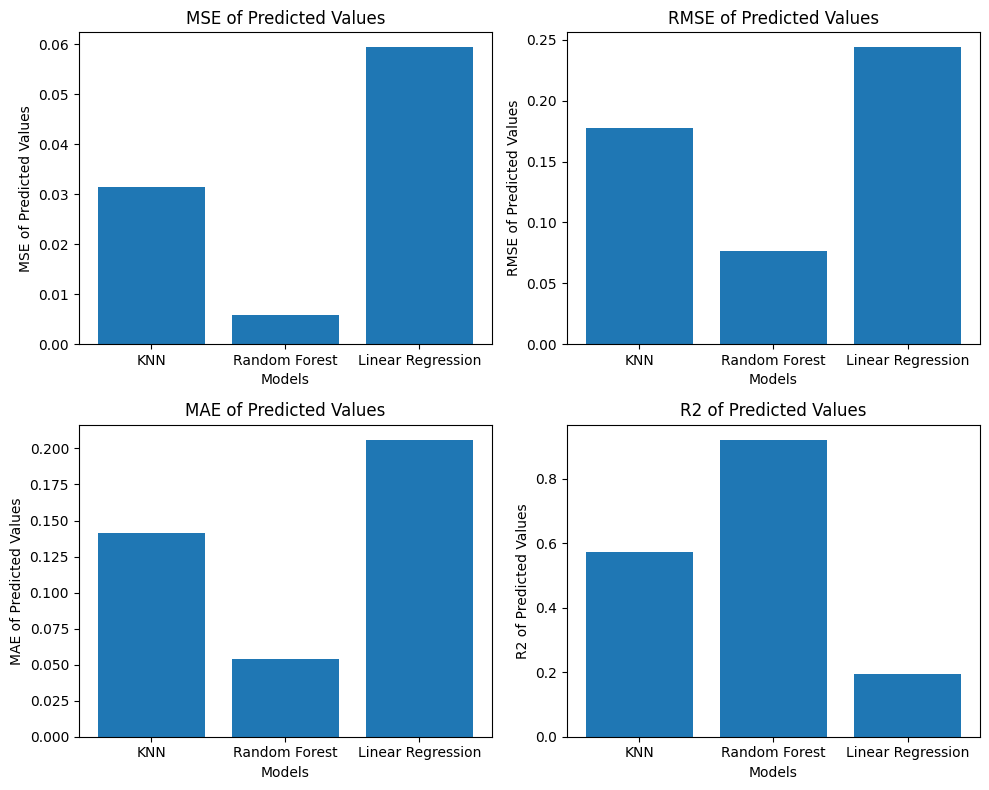

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.bar(labels, [v[i] for v in values])
    ax.set_title(metrics[i])
    ax.set_xlabel('Models')
    ax.set_ylabel(metrics[i])

plt.tight_layout()
plt.show()

**K Means Clustering**

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
x = df[['day','month',	'year',	'hour',	'minute',	'day_of_week',	'week_of_year',	'code_number',	'occupancy_rate']]
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [45]:
# Perform K-means clustering with different number of clusters
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette score: 0.4290654249116791


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette score: 0.4583107528149108


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette score: 0.37181800666682946


**Decision Tree**

In [46]:
df = pd.read_csv("dataset.csv")

In [47]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [48]:
df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])

In [49]:
reference_point = pd.to_datetime('1970-01-01')
df['LastUpdated'] = (df['LastUpdated'] - reference_point).dt.total_seconds()

In [50]:
X = df[['Capacity', 'LastUpdated']]
y = df['Occupancy']

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [53]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage, "%")

Accuracy: 3.177491601343785 %


**MLP**

In [55]:
from sklearn.neural_network import MLPClassifier
# Model training
model = MLPClassifier(random_state=1, max_iter=100)
model.fit(X_train, y_train)
# Model prediction
y_pred = model.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage, "%")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.06998880179171332 %


**Conclusion**

This dataset for predicting parking occupancy is appropriate for only regression tasks. I have implemented Random forest regressor, Linear regressor and KNN. As per the instruction K-means clustering, MLP and Decision Tree have also implemented but not performed well for this dataset.

The regression models are the appropriate algorithms to be implemented to analyse the ML models and to predict the occupancy.